# Debugging for dataset
## script
    - Make sure the dataset script is in `vos/dataset/`
    - And this notebook is working on `COCO.py`

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from vos.datasets.COCO import COCO

In [2]:
root = "/p300/videoObjSeg_dataset/COCO-2017-train"
cocod = COCO(root, mode= "train", max_n_objects= 8)

data = cocod[0]
for k, v in data.items():
    print(k, v.shape)

loading annotations into memory...
Done (t=30.47s)
creating index...
index created!
image torch.Size([3, 360, 640])
mask torch.Size([9, 360, 640])
n_objects torch.Size([])


tensor(4) (360, 640, 9)


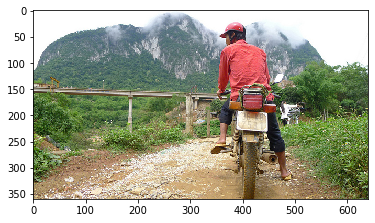

In [3]:
image = data["image"].numpy().transpose(1,2,0)
mask = data["mask"].numpy().transpose(1,2,0)

print(data["n_objects"], mask.shape)
no = data["n_objects"]
H, W, N = mask.shape
plt.imshow(image)

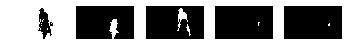

In [4]:
fig = plt.figure()
for i in range(no+1):
    a = fig.add_subplot(1, no+1, i+1)
    plt.imshow(mask[:,:,i], cmap= "gray")
    plt.axis("off")

## Bug confirmed:
    Wrong masked in channel whose idx is greater than 1

In [ ]:
import skimage.io as io

In [ ]:
idx = 0

img = cocod.coco.loadImgs(cocod.imgIds[idx])[0]
# This image is in (H, W, C) shape
image = io.imread('%s/images/%s'%(
    cocod._root,
    img['file_name']
)).astype(np.float32)

annIds = cocod.coco.getAnnIds(imgIds= img["id"])
anns = cocod.coco.loadAnns(annIds)

ann = anns[1]
ann_mask = cocod.coco.annToMask(ann)
H, W = ann_mask.shape
print(ann_mask.shape)

In [ ]:
plt.imshow(ann_mask, cmap= "gray")

In [ ]:
mask = np.empty((H, W, 1), dtype= np.uint8)
print((mask == 0).all())
mask[:, :, 0] |= ann_mask
plt.imshow(mask[:,:,0], cmap= "gray")

In [ ]:
mask = np.zeros((H, W, 1), dtype= np.uint8)
print((mask == 0).all())
mask[:, :, 0] |= ann_mask
plt.imshow(mask[:,:,0], cmap= "gray")